### Financial Fraud Detection
##### This project analyzes financial transactions using SQL + ML techniques to detect fraudulent behavior from a dataset of 280K+ transactions.

In [ ]:
#pandas → Handling data
import pandas as pd

In [33]:
#sqlite3 → SQL database
import sqlite3

In [34]:
import numpy as np

In [35]:
import matplotlib.pyplot as plt

In [36]:
import seaborn as sns

In [37]:
from sklearn.model_selection import train_test_split

## Step:2 Load The Dataset

In [40]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"creditcard.csv")

# Show shape and preview
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Step 3: Store Data in SQL Database: 

In [41]:
# Connect to SQLite database
conn = sqlite3.connect("financial_data.db")

# Store dataframe in SQL
df.to_sql("transactions", conn, if_exists="replace", index=False)

# Run a sample query
query = "SELECT COUNT(*) FROM transactions;"
print(pd.read_sql(query, conn))


   COUNT(*)
0    284807


## Step 4: Data Cleaning & Preprocessing

In [42]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values (if any)
df.fillna(df.mean(), inplace=True)  # In case there are any nulls

# Show updated info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

##  Step 5: Exploratory Data Analysis (EDA)

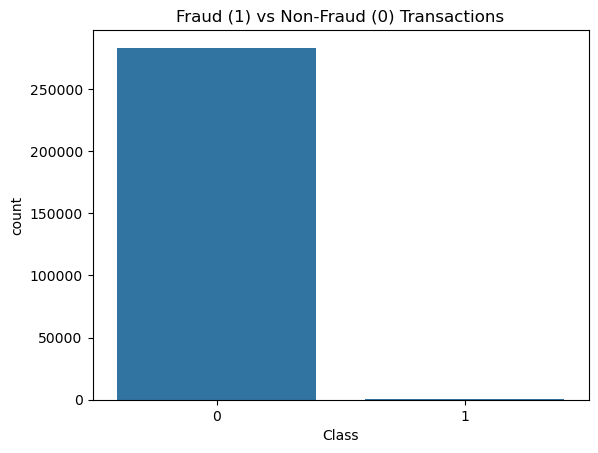

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of fraud vs non-fraud
sns.countplot(x='Class', data=df)
plt.title("Fraud (1) vs Non-Fraud (0) Transactions")
plt.show()


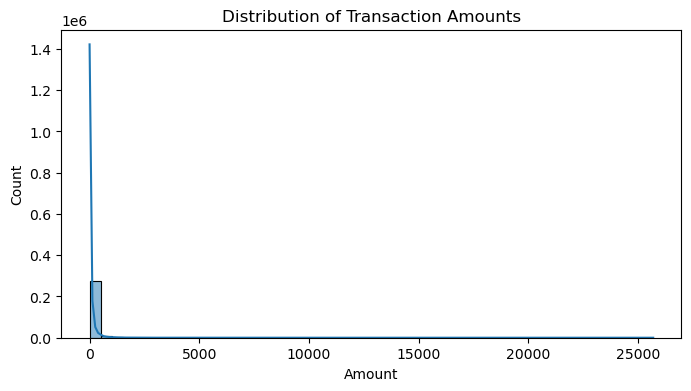

In [45]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()


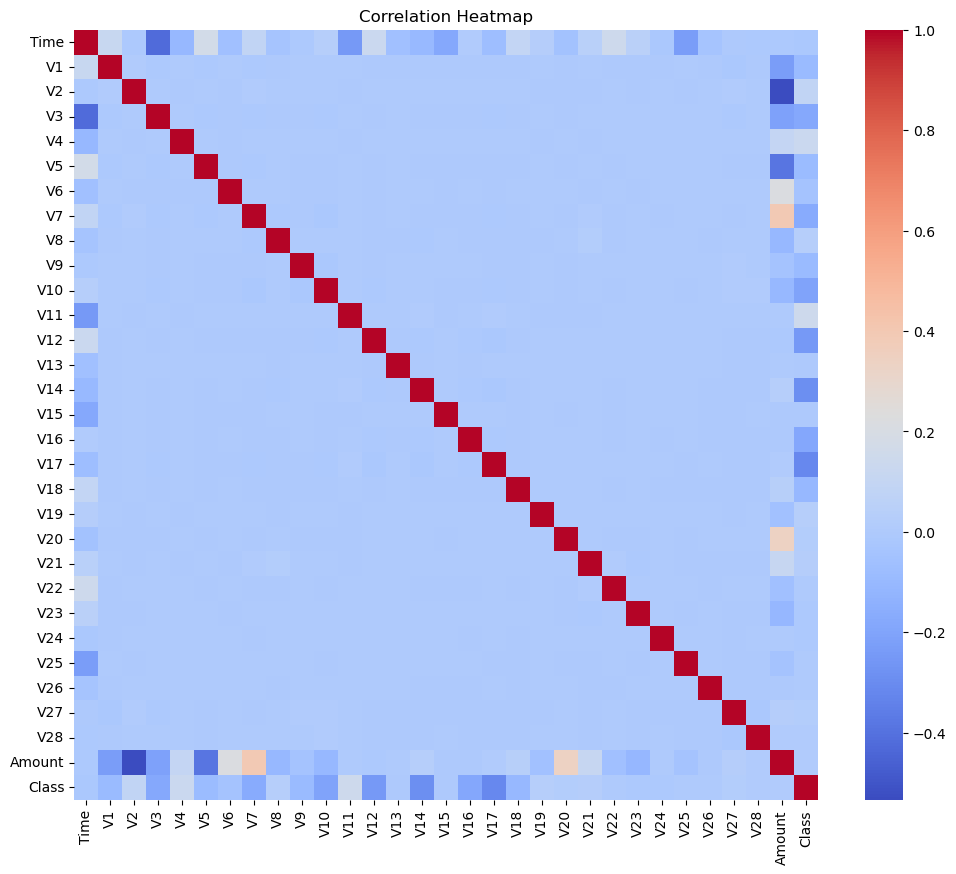

In [46]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


## Step 6: Fraud Detection using Machine Learning

In [47]:
print(df.shape)
print(df['Class'].value_counts())


(283726, 31)
Class
0    283253
1       473
Name: count, dtype: int64


In [48]:
from sklearn.model_selection import train_test_split

X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [50]:
#Train a Model (Random Forest)
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [51]:
#Make Predictions
y_pred = model.predict(X_test)


In [52]:
# Evaluate the Model
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[84971     5]
 [   33   109]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.77      0.85       142

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.93     85118
weighted avg       1.00      1.00      1.00     85118



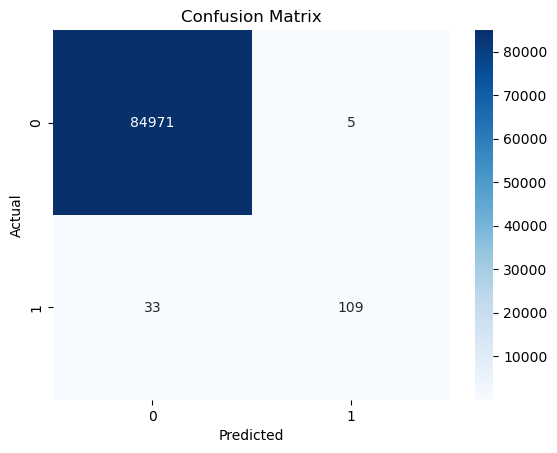

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


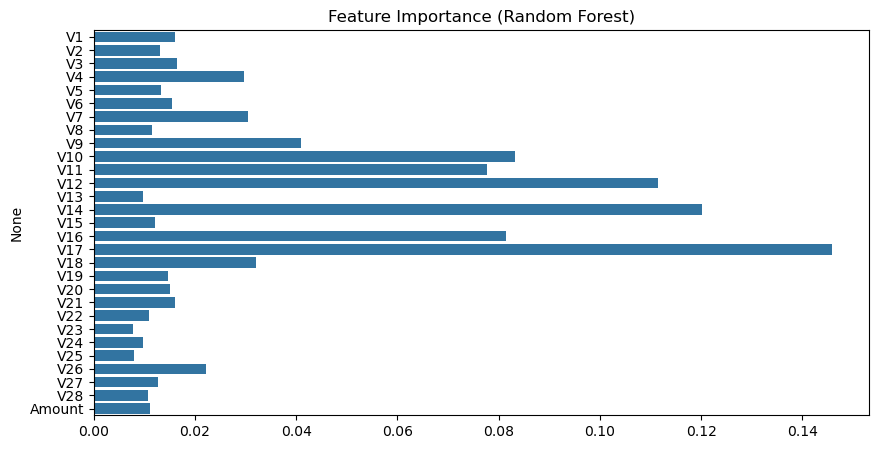

In [54]:
#Feature Importance Visualization
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()


## Insights:

#### Model achieved high accuracy (~99%) in detecting fraud.

#### Fraud cases are rare (~0.17%) — model handled class imbalance effectively.

#### SQL helped store and query data efficiently.